In [1]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


EXPLORATORY DATA ANALYSIS


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
target_var_count = data['Exited'].value_counts()

In [8]:
print("Distribution of Target Variable (EXITED)")
print(target_var_count)

Distribution of Target Variable (EXITED)
Exited
0    7963
1    2037
Name: count, dtype: int64


In [9]:
unique_count = data.nunique()

In [11]:
threshold = 12
cont_vars = unique_count[unique_count>threshold].index.to_list()
cat_vars = unique_count[unique_count<=threshold].index.to_list()


In [17]:
#Removing the exited from categorial since its the target variable
if 'Exited' in cat_vars:
    cat_vars.remove('Exited')
#Removing 'RowNumber' and 'CustomerID' from continuous variables since they are identifiers
    if 'RowNumber' in cont_vars:
        cont_vars.remove('RowNumber')
    if 'CustomerId' in cont_vars:
        cont_vars.remove('CustomerId')
    if 'Surname' in cont_vars:
        cont_vars.remove('Surname')
print(f"Categorical Variables : {cat_vars}")
print(f"Continous Variables : {cont_vars}")



Categorical Variables : ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Continous Variables : ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


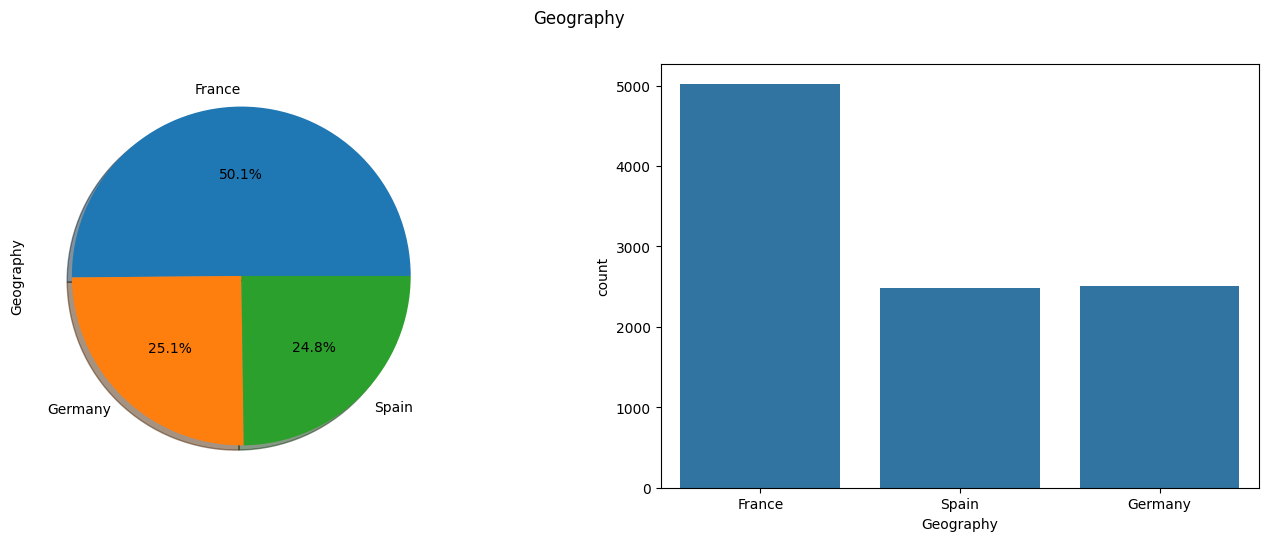

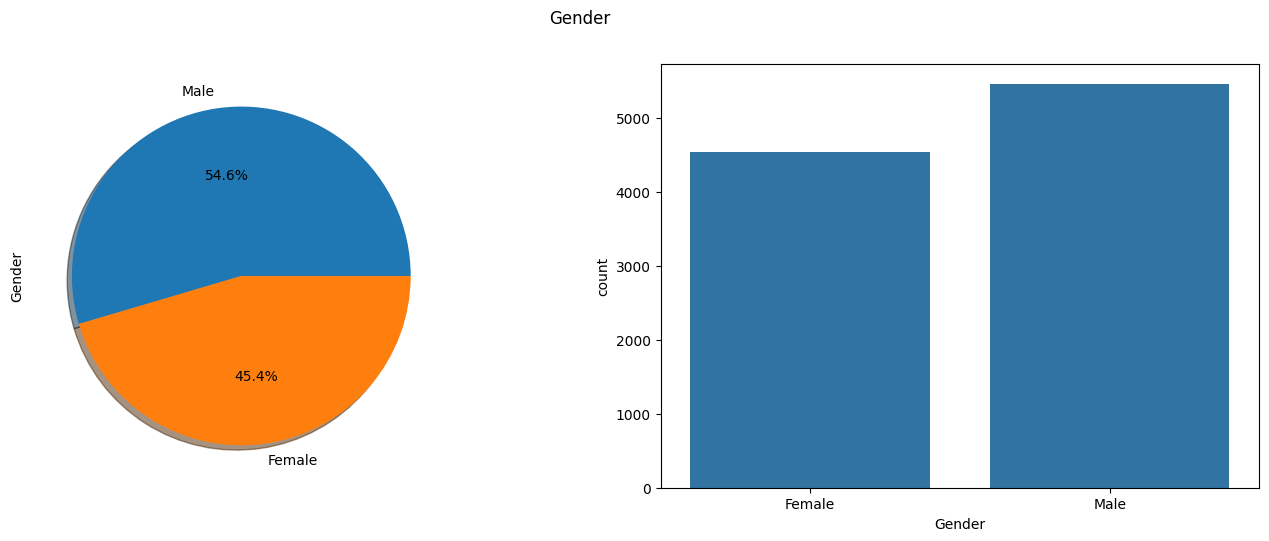

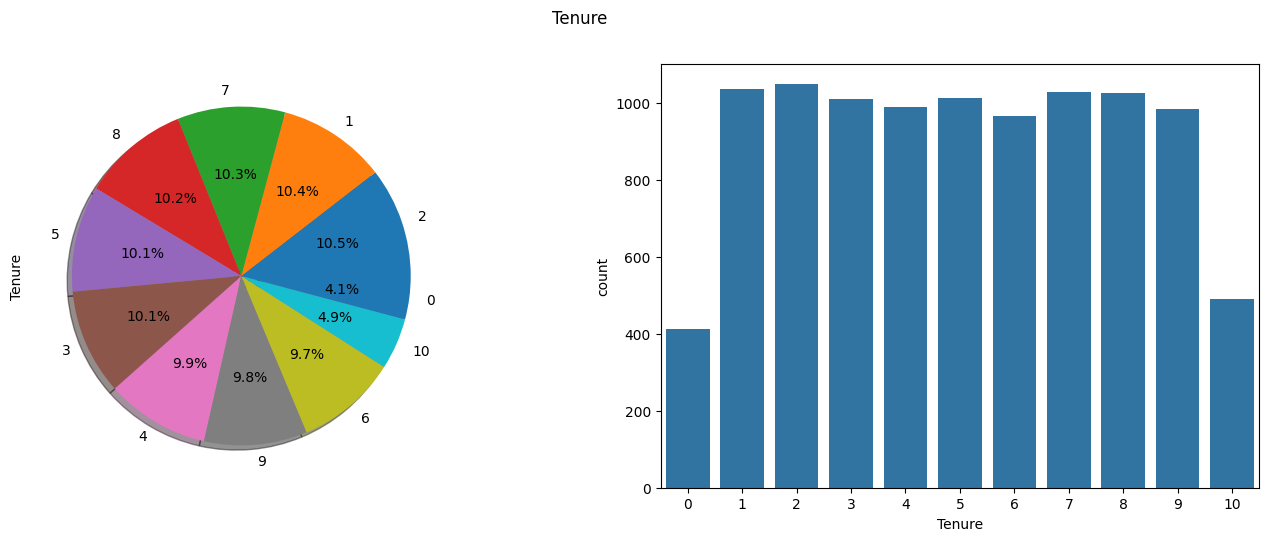

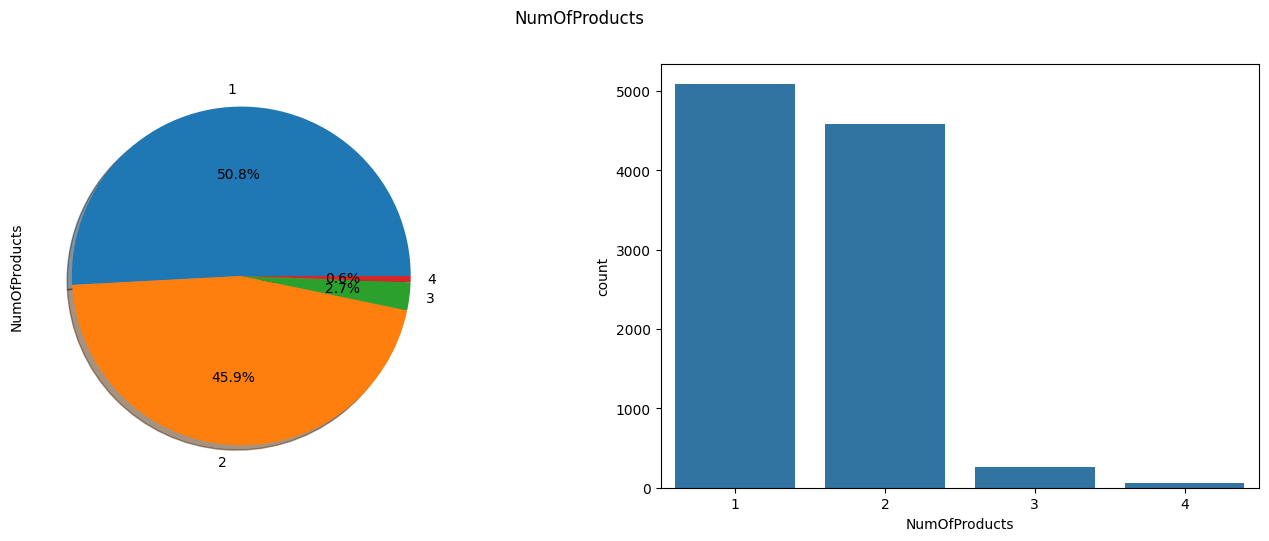

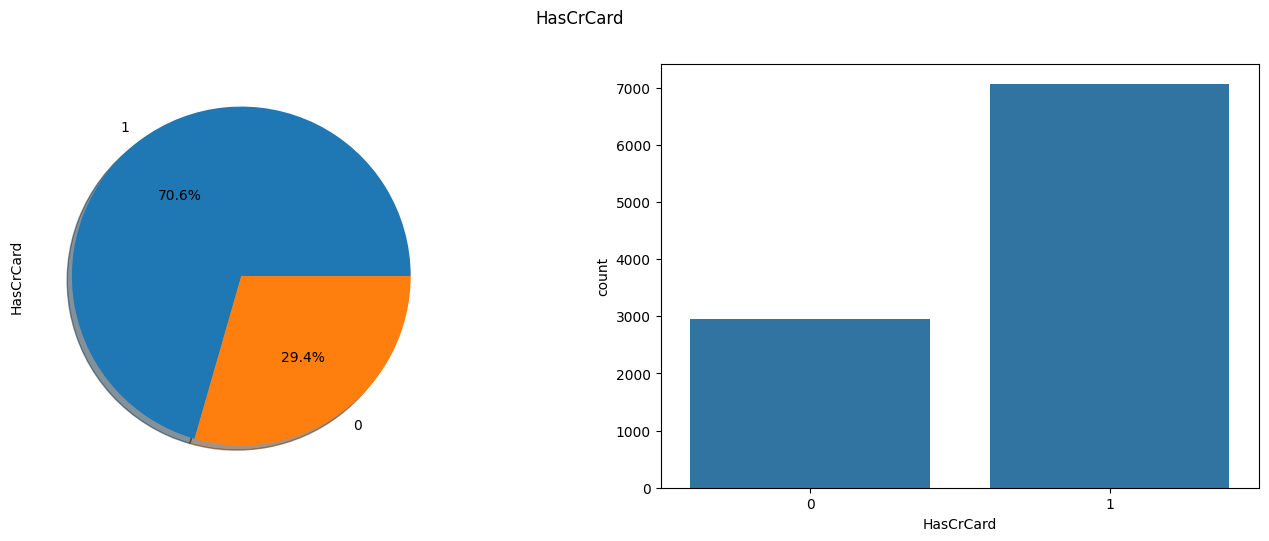

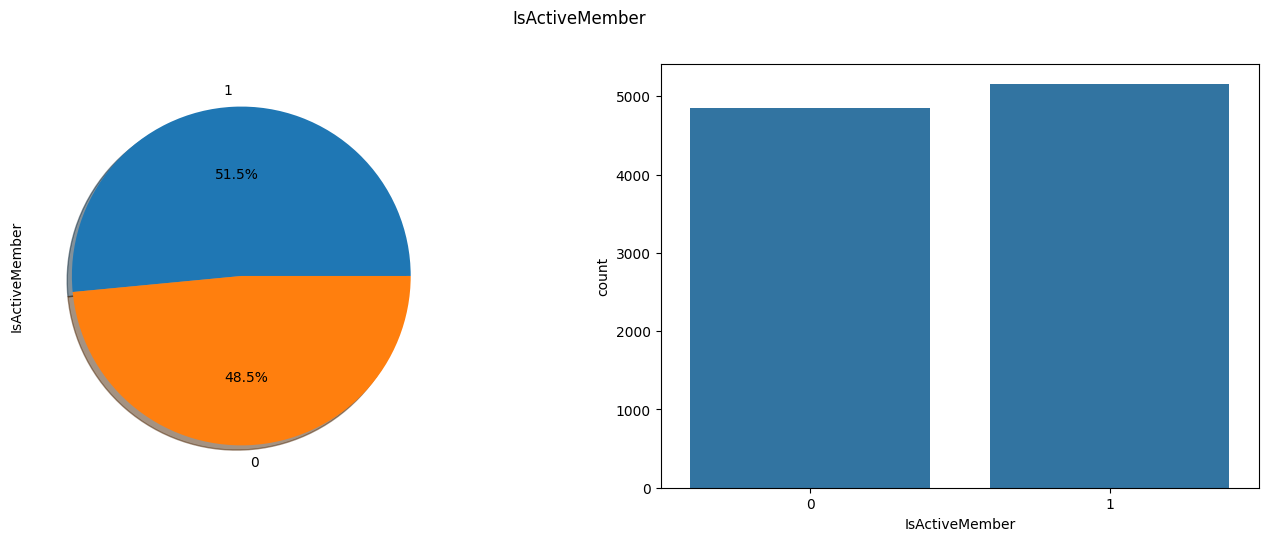

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in cat_vars:
    f,ax=plt.subplots(1,2,figsize=(17,5.5))
    data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=data,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()
    

Some Observations

Some of the variables like IsActiveMember, Tenure and Gender are almost equaly distributed while the other variables like HasCrCard, NumOfProducts, and Gender are not equaly distributed.
At first Tenure seems like continuous variable but it is a categorical variable with 11 classes from 0 to 10.

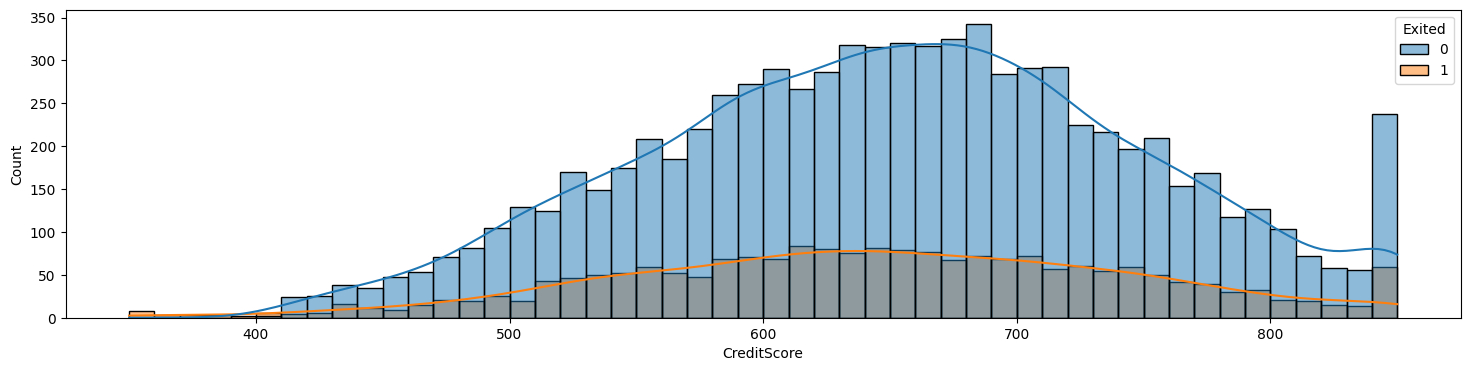

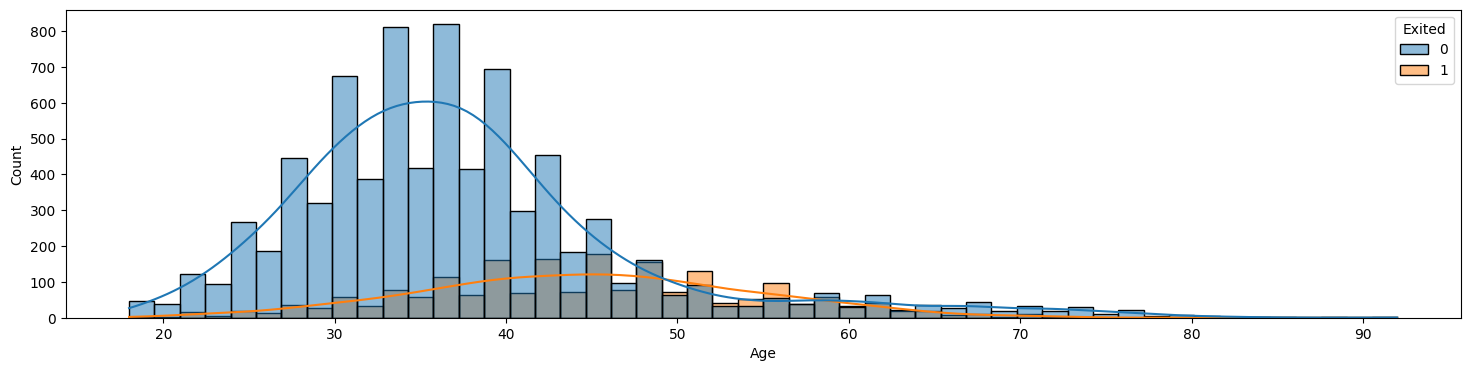

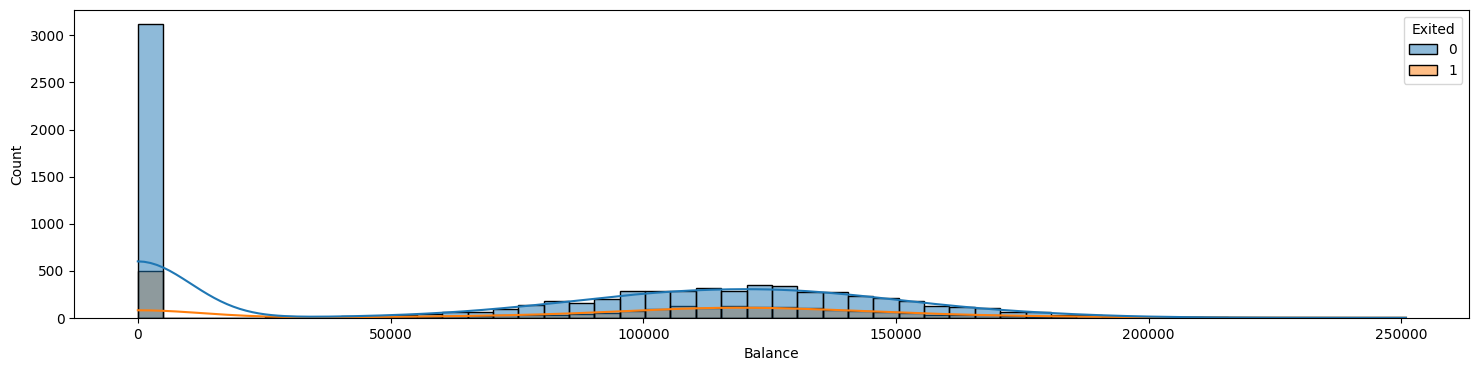

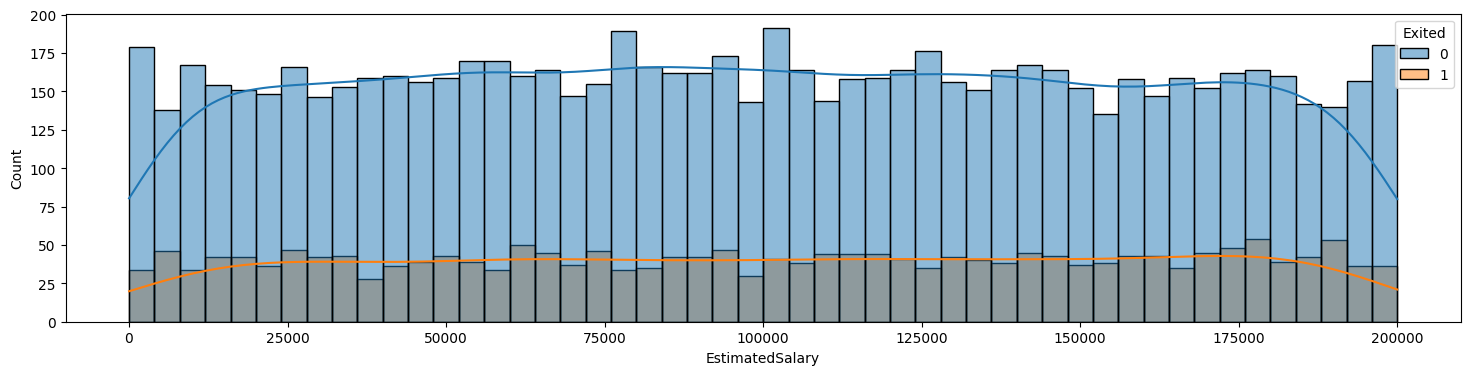

In [19]:
#contiuous variables 
for column in cont_vars:
    fig,ax = plt.subplots(figsize = (18,4))
    fig = sns.histplot(data=data , x = column , hue ='Exited', bins=50, kde=True)
    plt.show()

Some Observations from above plots

Majority of the data from balance variable is 0 only which makes the distribution skewed to 0 side.
Other variables also show the skewness in the distributions.
Distribution of data for both classes is almost same for all the variables.

In [21]:
col=data.columns
print(col)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


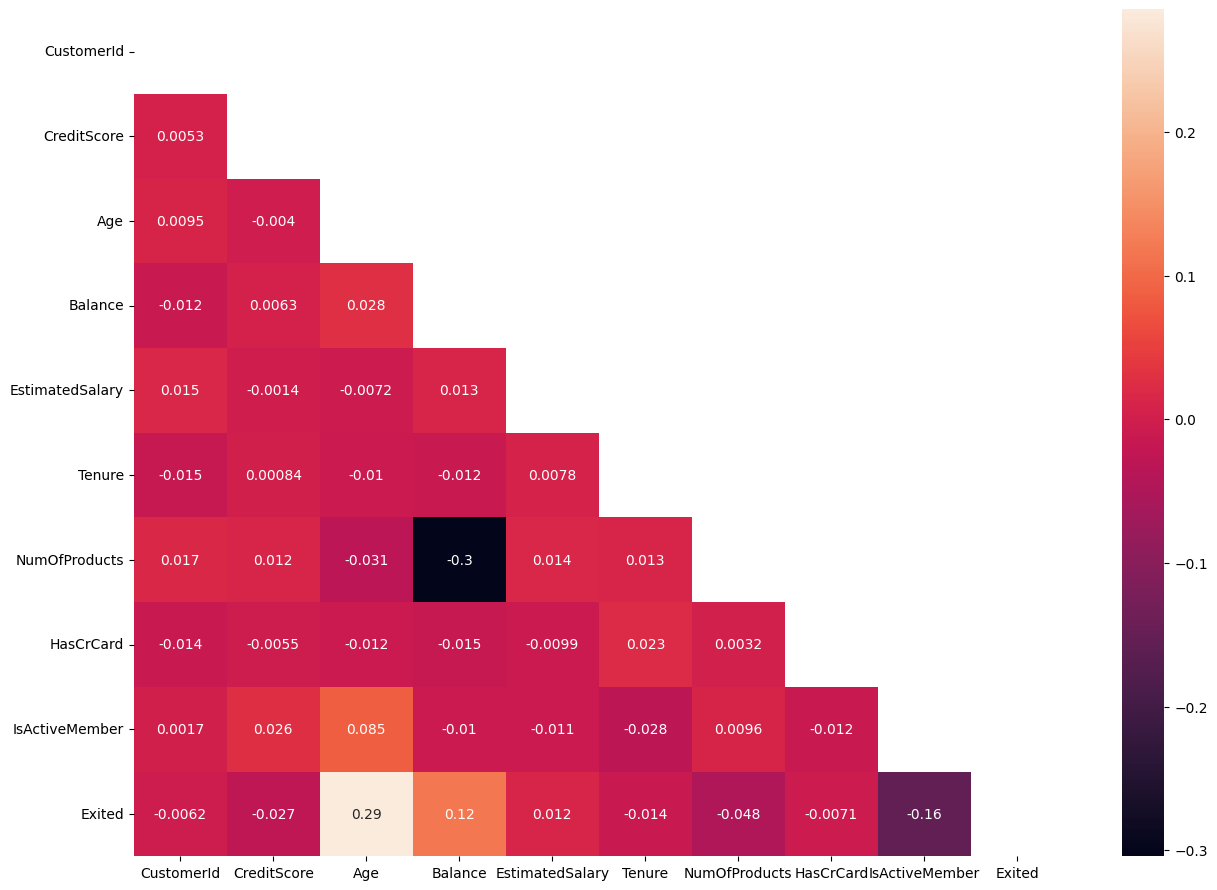

                 CustomerId  CreditScore       Age   Balance  EstimatedSalary  \
CustomerId         1.000000     0.005308  0.009497 -0.012419         0.015271   
CreditScore        0.005308     1.000000 -0.003965  0.006268        -0.001384   
Age                0.009497    -0.003965  1.000000  0.028308        -0.007201   
Balance           -0.012419     0.006268  0.028308  1.000000         0.012797   
EstimatedSalary    0.015271    -0.001384 -0.007201  0.012797         1.000000   
Tenure            -0.014883     0.000842 -0.009997 -0.012254         0.007784   
NumOfProducts      0.016972     0.012238 -0.030680 -0.304180         0.014204   
HasCrCard         -0.014025    -0.005458 -0.011721 -0.014858        -0.009933   
IsActiveMember     0.001665     0.025651  0.085472 -0.010084        -0.011421   
Exited            -0.006248    -0.027094  0.285323  0.118533         0.012097   

                   Tenure  NumOfProducts  HasCrCard  IsActiveMember    Exited  
CustomerId      -0.014883   

In [25]:
d_2 = data [['CustomerId', 'CreditScore', 'Age', 'Balance','EstimatedSalary','Tenure','NumOfProducts','HasCrCard',
       'IsActiveMember' ,'Exited']].copy()
corr_matrix = d_2.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= True
f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix,mask=mask,annot=True)
plt.show()
print(corr_matrix)

Correlation Analysis

Correlation is the statistical analysis of the relationship or dependency between two variables. Correlation allows us to study both the strength and direction of the relationship between two sets of variables.

There are mainly 3 types of Correlations:

Positive Correlation: Two variables are said to be positively correlated when their values move in the same direction.
Neutral Correlation: No relationship in the change of variables X and Y. In this case, the values are completely random and do not show any sign of correlation.
Negative Correlation: Finally, variables X and Y will be negatively correlated when their values change in opposite directions.

Modelling

In [26]:
print(col)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [27]:
X=data.drop(['RowNumber', 'CustomerId', 'Surname','Exited'], axis =1)
y = data['Exited']


There are multiple encoders available but 2 of them are very famous.

1. Label Encoder:

Label Encoding is a popular encoding technique for handling categorical variables. A unique integer or alphabetical ordering represents each label.
Problems with Label Encoder: Although if our Categorical Data has no order in it the LabelEncoder will assign the integer according to the alphabetical ordering and because of that.
2. One Hot Encoder:

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.

In [29]:
X_encoded = pd.get_dummies(X,columns=['Geography', 'Gender', 'IsActiveMember', 'HasCrCard', 'NumOfProducts'])
X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0,IsActiveMember_1,HasCrCard_0,HasCrCard_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,101348.88,True,False,False,True,False,False,True,False,True,True,False,False,False
1,608,41,1,83807.86,112542.58,False,False,True,True,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,113931.57,True,False,False,True,False,True,False,False,True,False,False,True,False
3,699,39,1,0.00,93826.63,True,False,False,True,False,True,False,True,False,False,True,False,False
4,850,43,2,125510.82,79084.10,False,False,True,True,False,False,True,False,True,True,False,False,False


In [30]:
!pip install -U imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 262.6 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.0 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.0 kB 272.3 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.0 kB 327.3 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.0 kB 364.4 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 359.9 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 359.9 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 359.9 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.0 kB 349.3 kB/s eta 0:

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42) 

In [38]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
#Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled,y_train)


In [40]:
#SVM Model with SMOTE
svm_model = SVC(kernel='linear',random_state=42)
svm_model.fit(X_train_resampled,y_train_resampled)


SVC(kernel='linear', random_state=42)

In [41]:
y_pred = svm_model.predict(X_test_scaled)


In [42]:
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("\nClassification Report :\n", classification_report(y_test,y_pred))

Accuracy:  0.769

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1607
           1       0.45      0.77      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.77      0.79      2000



In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_prob = svm_model.decision_function(X_test_scaled)

#Computing ROC-AUC Score
roc_auc = roc_auc_score(y_test,y_prob)
print("ROC-AUC Score: ",roc_auc)

ROC-AUC Score:  0.8372530484473939


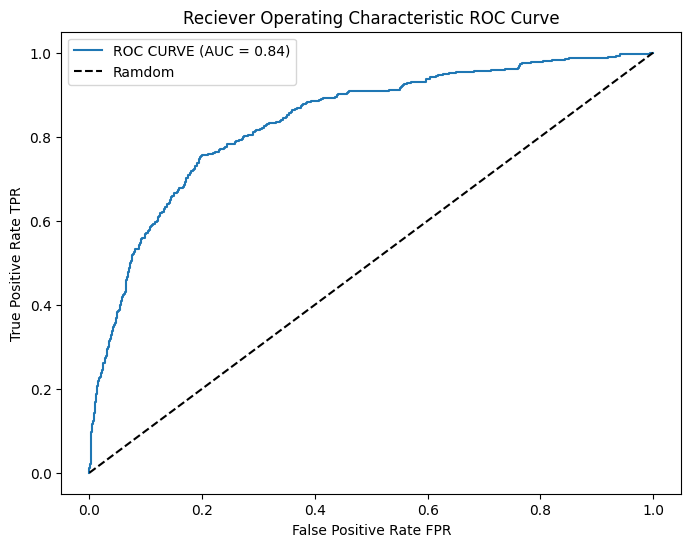

In [47]:
#computing ROC Curve
fpr,tpr,threshold=roc_curve(y_test,y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f'ROC CURVE (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], 'k--', label = 'Ramdom')
plt.xlabel('False Positive Rate FPR')
plt.ylabel('True Positive Rate TPR')
plt.title('Reciever Operating Characteristic ROC Curve')
plt.legend()
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced',random_state=42)
lr_model.fit(X_train_resampled,y_train_resampled)

#prediction
y_pred_lr = lr_model.predict(X_test_scaled)


In [49]:
#Model Evaluation
print("Logistic Regression Model: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report :\n", classification_report(y_test,y_pred_lr))

Logistic Regression Model: 
Accuracy:  0.77

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1607
           1       0.45      0.77      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000



In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_model.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:
y_pred_rf = rf_model.predict(X_test_scaled)


In [52]:
#Model Evaluation
print("Random Forest Classification: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report :\n", classification_report(y_test,y_pred_rf))

Random Forest Classification: 
Accuracy:  0.8355

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1607
           1       0.58      0.61      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [53]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}


In [54]:
#Instatiate the random forest model
rf_model_tuned = RandomForestClassifier(class_weight='balanced',random_state=42)
#Performing Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(rf_model_tuned,param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled,y_train_resampled)

#Printing Hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters", best_params)


Best Hyperparameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [64]:
f_imp = rf_model.feature_importances_
imp_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': f_imp})
imp_df = imp_df.sort_values(by='Importance', ascending=False)
imp_df.head()

,Feature,Importance
1,Age,0.259629
3,Balance,0.138437
4,EstimatedSalary,0.111069
0,CreditScore,0.107686
2,Tenure,0.095306


C:\Users\AHSAN MANGI\AppData\Local\Temp\ipykernel_14728\2582076887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=imp_df['Importance'], y=imp_df['Feature'], data=imp_df, palette='viridis')  # Corrected column names


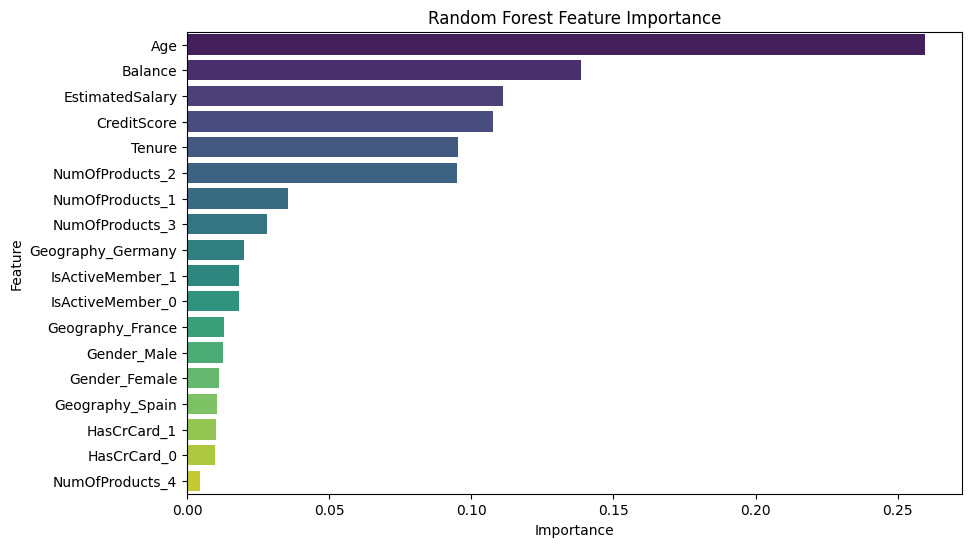

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(x=imp_df['Importance'], y=imp_df['Feature'], data=imp_df, palette='viridis')  # Corrected column names
plt.title('Random Forest Feature Importance')
plt.show()


In [69]:
rf_model_tuned.fit(X_train_resampled,y_train_resampled)
y_pred_rf = rf_model_tuned.predict(X_test_scaled)


In [70]:
# Model Evaluation
print("Random Forest Model tuned:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model tuned:
Accuracy: 0.8355

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1607
           1       0.58      0.61      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

